## DS 5220 Final Project - Image classification of CIFAR-10 Dataset

---



NAME: Shashank Bettada

Course: DS 5220 Spring 2023

**Introduction to the CIFAR-10 dataset:**

---



CIFAR-10 is a dataset of 50,000 32x32 colored training images and 10,000 test images, labeled with 10 categories.


In the project, I have performed image classification on the CIFAR-10 dataset using
1. Deep Neural Network without Convolutional Layer
2. Deep Neural Network with Convolutional Layer


**Brief Introduction to the above two methods**

---



1. Deep Neural Network without without Convolutional Layer (CNN):

A DNN is a type of artificial neural network (ANN) that has multiple layers of processing units (neurons), between the input and output layers. Each layer in a deep neural network is composed of interconnected neurons, and each neuron applies a mathematical function (also called activation function) to its inputs and produces an output.

**DNNs** are designed to learn hierarchical representations of data, where each layer of the network learns to represent increasingly abstract and complex features of the input data.

By stacking multiple layers of neurons, a DNN is able to learn more sophisticated representations of data, and can be used for a wide range of tasks, such as image and speech recognition, natural language processing, and many others.

However, DNNs are typically used for problems that involve tabular data, such as classification and regression tasks.

2. Deep Neural Network with Convolutional Layer (CNN):

A convolutional neural network (CNN) is a type of deep neural network that is designed to process and analyze image data. Unlike traditional neural networks, which process data in a sequential manner, CNNs are able to process data with spatial relationships, such as images, in a more efficient way.

The key feature of a CNN is the convolutional layer, which consists of a set of filters or kernels that are applied to the input data. These filters are used to detect features in the input data, such as edges, corners, or other visual patterns. The output of the convolutional layer is a set of feature maps, which represent the presence of each detected feature at different locations in the input image.

After the convolutional layer, CNNs typically include one or more pooling layers, which are used to reduce the dimensionality of the feature maps and capture the most important features of the input image.

Finally, the output of the pooling layer is fed into one or more fully connected layers, which are used to classify the input image. The fully connected layers take the high-level features extracted by the convolutional and pooling layers and use them to make predictions about the class or category of the input image.

The possible layers in a CNN are summarised below:

1. Convolutional layer: This layer applies a set of filters to the input image to extract certain features.

2. Pooling layer: This layer downsamples the output of the convolutional layer by reducing the size of the feature maps.

3. Activation layer: This layer applies a non-linear activation function to the output of the previous layer.

4. Batch Normalization layer: This layer normalizes the output of the previous layer, improving the stability and speed of training.

5. Dropout layer: This layer randomly drops out some of the neurons in the previous layer during training, preventing the model from overfitting to the training data.

Loading the required libraries for the project:

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import datetime
import matplotlib.pyplot as plt

Loading the dataset as train-test split:

In [ ]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [ ]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [ ]:
# Convert class vectors to binary class matrices
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

DNN w/o Convolution Layer:

In [ ]:
def dnn_model():
    model = tf.keras.models.Sequential([
      tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
      tf.keras.layers.Dense(1024, activation='relu'),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(256, activation='relu'),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dense(10, activation='softmax')
    ])

    optimizer = tf.keras.optimizers.Adam()
    model.compile(loss='categorical_crossentropy',
              optimizer = optimizer,
              metrics=['accuracy'])

    model.summary()

    return model

In [ ]:
epochs = 20
model = dnn_model()
strt_time = datetime.datetime.now()
history = model.fit(x_train, y_train,
                    epochs = epochs,
                    validation_data=(x_test, y_test))
end_time = datetime.datetime.now()
total_time = end_time - strt_time
dnn_train_time = total_time.total_seconds()
print("DNN w/o Convolution trained. Time elapsed: ", dnn_train_time, "s")


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 3072)              0         
                                                                 
 dense_11 (Dense)            (None, 1024)              3146752   
                                                                 
 dense_12 (Dense)            (None, 512)               524800    
                                                                 
 dense_13 (Dense)            (None, 256)               131328    
                                                                 
 dense_14 (Dense)            (None, 128)               32896     
                                                                 
 dense_15 (Dense)            (None, 10)                1290      
                                                                 
Total params: 3,837,066
Trainable params: 3,837,066
No

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 1.551774263381958
Test accuracy: 0.44269999861717224


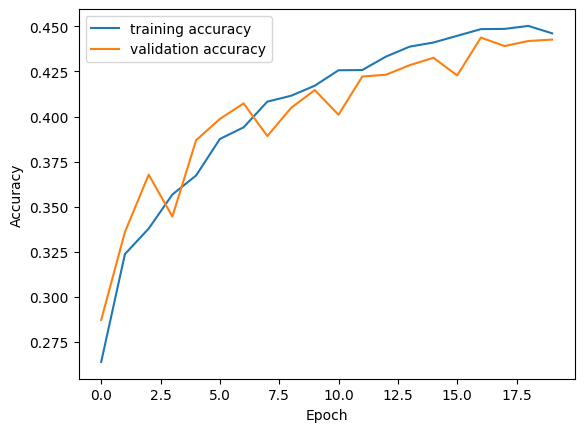

In [ ]:
# Plot accuracy curve
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


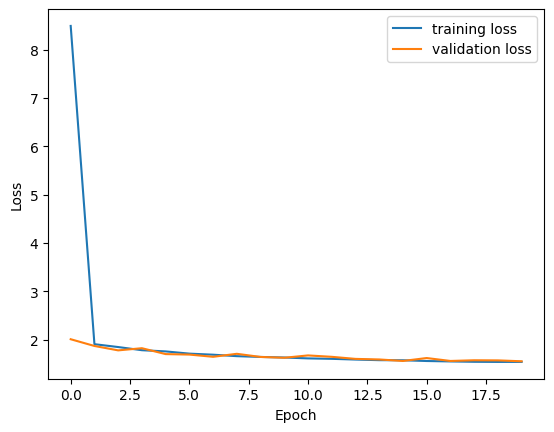

In [ ]:
# Plot loss curve
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(loc="best")
plt.show()

**Analysis:**

---



1. Accuracy:

The final accuracy we achieve is 0.44

As DNN is not typically designed for processing data with spatial relationships, it performs poorly when used on image classification. The training and validation curves follow a realtively close fit.

2. Loss:

We see that the training and validation loss also follow a close fit. As the two curves are closely hugging each other, we can conclude that it is a good fit.

The criteria upon which we decide if a fit is good or bad is as follows:

a. The plot of training loss decreases to a point of stability.

b. The plot of validation loss decreases to a point of stability and has a small gap with the training loss.


DNN with Convolution Layer:

In [ ]:
# define the model
def cnn_model():
  model = keras.Sequential(
    [
       layers.Conv2D(64,(4,4),input_shape=(32,32,3),activation = "relu"),
       layers.Conv2D(64,(4,4),input_shape=(32,32,3),activation = "relu"),
       layers.MaxPooling2D(pool_size = (2,2)),
       layers.Dropout(0.4),
       layers.Conv2D(128,(4,4),input_shape=(32,32,3),activation = "relu"),
       layers.Conv2D(128,(4,4),input_shape=(32,32,3),activation = "relu"),
       layers.MaxPooling2D(pool_size=(2,2)),
       layers.Dropout(0.4),
       layers.Flatten(),
       layers.Dense(1024,activation = "relu"),
       layers.Dense(1024,activation = "relu"),
       layers.Dense(num_classes, activation = "softmax"),
    ]
  )

  model.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"],
  )

  model.summary()
  return model

In [ ]:
# train the model
batch_size = 32
epochs = 10
model = cnn_model()
strt_time = datetime.datetime.now()
history = model.fit(
    x_train,
    y_train,
    batch_size = batch_size,
    epochs=epochs,
    validation_data=(x_test, y_test),
    shuffle=True,
)
end_time = datetime.datetime.now()
total_time = end_time - strt_time
cnn_train_time = total_time.total_seconds()
print("DNN with Convolution trained. Time elapsed: ", total_time.total_seconds(), "s")

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 29, 29, 64)        3136      
                                                                 
 conv2d_5 (Conv2D)           (None, 26, 26, 64)        65600     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 13, 13, 64)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 10, 10, 128)       131200    
                                                                 
 conv2d_7 (Conv2D)           (None, 7, 7, 128)         262272    
                                                      

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 1.1543192863464355
Test accuracy: 0.6007999777793884


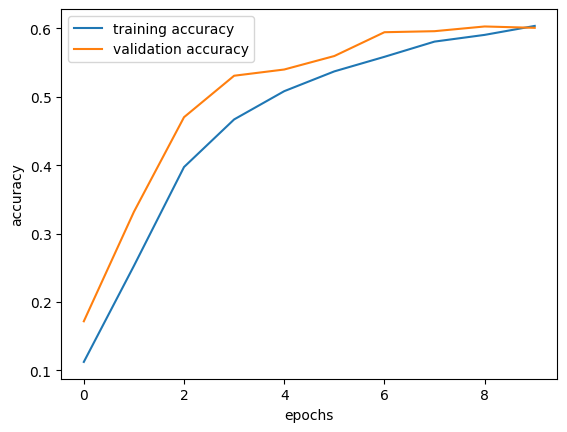

In [ ]:
# Plot accuracy curve
plt.plot(history.history["accuracy"], label="training accuracy")
plt.plot(history.history["val_accuracy"], label="validation accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend(loc="best")
plt.show()

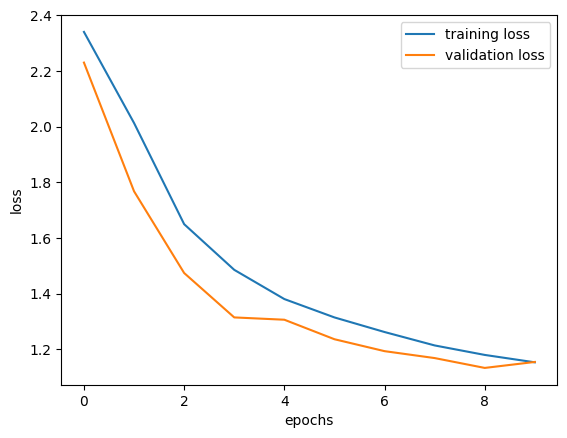

In [ ]:
# Plot loss curve
plt.plot(history.history["loss"], label="training loss")
plt.plot(history.history["val_loss"], label="validation loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend(loc="best")
plt.show()

**Analysis:**

---



1. Accuracy:

We see that the model performs poorly on the training data. However, there is significant improvement in the test results. This implies that our model does not overfit the data. Although for a closely hugging fit, we still need to tamper with the convolutional layers of the model and increase the number of epochs. As this is a computationally expensive procedure, I have limited it to a standard convolutional network. The accuracy we have achieved is: 0.60

2. Loss:

We have achieved a decent for the loss as well. For the plot of training loss to decrease to a point of stability we must increase the number of epochs. Also the gap between the two curves is minimized at epoch 8. Hence, we can conclude that we have a resonably good fit for the number of epochs that our model has been trained on.

**Comparison of Convergence Speed:**

---



To compare the the convergence speeds, let us consider a threshold epoch of 1.  At epoch = 1, the DNN (w/o CNN) classifier’s training loss curve is at a loss = 2 and over the successive epochs, drops to a minimum of approximately 1.8.

The training loss curve of the CNN (DNN with CNN) classifier is approximately 1.8 and over the successive epochs drops to a minimum of 1.2.

We see that the steeper descent after the threshold is observed in the CNN whereas in the DNN it mostly remains flat. The steeper decrease in loss signifies faster convergence. Hence we can say that the CNN classifier converges faster.

**Comparison of Accuracy:**

---



The CNN (DNN with CNN) has a much better validation/test accuracy compared to the DNN classifier. This is beacuse, the CNN is designed to account for spatial relationship in the data and hence, it outperforms the DNN when classifying images.

The accuracy achieved with both the models is summarised below:
1. DNN w/o CNN: 0.44
2. DNN with CNN: 0.60